In [102]:
import pandas as pd
import numpy as np
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff

import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

## Описание переменных <br>
attr1 - net profit / total assets <br>
attr2 - total liabilities / total assets<br>
attr3 - working capital / total assets<br>
attr4 - current assets / short-term liabilities<br>
attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365<br>
attr6 - retained earnings / total assets<br>
attr7 - EBIT / total assets<br>
attr8 - book value of equity / total liabilities<br>
attr9 - sales / total assets<br>
attr10 - equity / total assets<br>
attr11 - (gross profit + extraordinary items + financial expenses) / total assets<br>
attr12 - gross profit / short-term liabilities<br>
attr13 - (gross profit + depreciation) / sales<br>
attr14 - (gross profit + interest) / total assets<br>
attr15 - (total liabilities * 365) / (gross profit + depreciation)<br>
attr16 - (gross profit + depreciation) / total liabilities<br>
attr17 - total assets / total liabilities<br>
attr18 - gross profit / total assets<br>
attr19 - gross profit / sales<br>
attr20 - (inventory * 365) / sales<br>
attr21 - sales (n) / sales (n-1)<br>
attr22 - profit on operating activities / total assets<br>
attr23 - net profit / sales<br>
attr24 - gross profit (in 3 years) / total assets<br>
attr25 - (equity - share capital) / total assets<br>
attr26 - (net profit + depreciation) / total liabilities<br>
attr27 - profit on operating activities / financial expenses<br>
attr28 - working capital / fixed assets<br>
attr29 - logarithm of total assets<br>
attr30 - (total liabilities - cash) / sales<br>
attr31 - (gross profit + interest) / sales<br>
attr32 - (current liabilities * 365) / cost of products sold<br>
attr33 - operating expenses / short-term liabilities<br>
attr34 - operating expenses / total liabilities<br>
attr35 - profit on sales / total assets<br>
attr36 - total sales / total assets<br>
attr37 - (current assets - inventories) / long-term liabilities<br>
attr38 - constant capital / total assets<br>
attr39 - profit on sales / sales<br>
attr40 - (current assets - inventory - receivables) / short-term liabilities<br>
attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))<br>
attr42 - profit on operating activities / sales<br>
attr43 - rotation receivables + inventory turnover in days<br>
attr44 - (receivables * 365) / sales<br>
attr45 - net profit / inventory<br>
attr46 - (current assets - inventory) / short-term liabilities<br>
attr47 - (inventory * 365) / cost of products sold<br>
attr48 - EBITDA (profit on operating activities - depreciation) / total assets<br>
attr49 - EBITDA (profit on operating activities - depreciation) / sales<br>
attr50 - current assets / total liabilities<br>
attr51 - short-term liabilities / total assets<br>
attr52 - (short-term liabilities * 365) / cost of products sold)<br>
attr53 - equity / fixed assets<br>
attr54 - constant capital / fixed assets<br>
attr55 - working capital<br>
attr56 - (sales - cost of products sold) / sales<br>
attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)<br>
attr58 - total costs /total sales<br>
attr59 - long-term liabilities / equity<br>
attr60 - sales / inventory<br>
attr61 - sales / receivables<br>
attr62 - (short-term liabilities *365) / sales<br>
attr63 - sales / short-term liabilities <br>
attr64 - sales / fixed assets<br>
__class__ - the response variable Y: 0 = did not bankrupt; 1 = bankrupt<br>


__Ссылки на источник данных на kaggle и ML repository:__<br>
https://www.kaggle.com/competitions/companies-bankruptcy-forecast/data?select=bankruptcy_sample_Y.csv<br>
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data


In [103]:
data = arff.loadarff('3year.arff')
df = pd.DataFrame(data[0])

In [104]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [105]:
#заменяем Y на 0 или 1 вместо b'0' и b'1'
df.loc[df["class"] == df["class"][0], "class"] = 0  
df.loc[df["class"] == df["class"][10502], "class"] = 1

In [106]:
df['class'].value_counts() #сколько банкротилось из 10.000

0    10008
1      495
Name: class, dtype: int64

In [107]:
df['class'].mean()*100 #какой % обанкротившихся компаний

4.712939160239932

In [108]:
GDP_def = 84.4365 #ср знач дефлятора за 2000 - 2013 (рассчитано в файле эксель)
df['SIZE'] = df['Attr29'] - np.log(GDP_def)

In [109]:
df_corr = df[['Attr1', 'Attr3', 'SIZE', 'Attr46', 'Attr9', 'class']].rename(columns={'Attr1': 'ROA',
                                                                'Attr3': 'WCTA',                                                                                     
                                                                'Attr46': 'CR',
                                                                'Attr9': 'SALETA'})

In [110]:
df_corr #таблица для построения регрессии

,ROA,WCTA,SIZE,CR,SALETA,class
0,0.174190,0.143710,1.5113,0.90221,1.19610,0
1,0.146240,0.282300,-0.3568,1.03300,1.60180,0
2,0.000595,0.488390,0.1860,2.32900,1.00770,0
3,0.024526,0.275460,-0.1760,0.90954,1.05090,0
4,0.188290,0.342310,0.1673,0.52685,1.33930,0
...,...,...,...,...,...,...
10498,0.002861,-0.223860,-0.1503,0.28983,1.01200,1
10499,-0.051968,0.147150,0.5262,1.40110,0.94694,1
10500,-0.135900,-0.342010,-0.3434,0.28790,1.09990,1
10501,0.009423,0.261630,-0.4244,0.90036,1.01230,1


In [111]:
df_corr.describe() #Основные описательные характеристики количественных переменных

,ROA,WCTA,SIZE,CR,SALETA
count,10503.000000,10503.000000,10503.000000,10485.000000,10500.000000
mean,0.052844,0.095490,-0.514821,8.978029,1.819254
std,0.647797,6.420056,0.840528,523.565601,7.581659
min,-17.692000,-479.730000,-4.794530,-6.469200,-1.215700
25%,0.000686,0.017461,-1.042800,0.602830,1.011275
50%,0.043034,0.198560,-0.503900,1.060600,1.199000
75%,0.123805,0.419545,0.013950,2.042600,2.059100
max,52.652000,17.708000,5.183900,53433.000000,740.440000


In [112]:
df_corr.corr() #корреляционная матрица

,ROA,WCTA,SIZE,CR,SALETA
ROA,1.000000,-0.271895,0.023342,0.001245,-0.055770
WCTA,-0.271895,1.000000,0.049239,0.001975,-0.004825
SIZE,0.023342,0.049239,1.000000,-0.019662,-0.076267
CR,0.001245,0.001975,-0.019662,1.000000,-0.002763
SALETA,-0.055770,-0.004825,-0.076267,-0.002763,1.000000


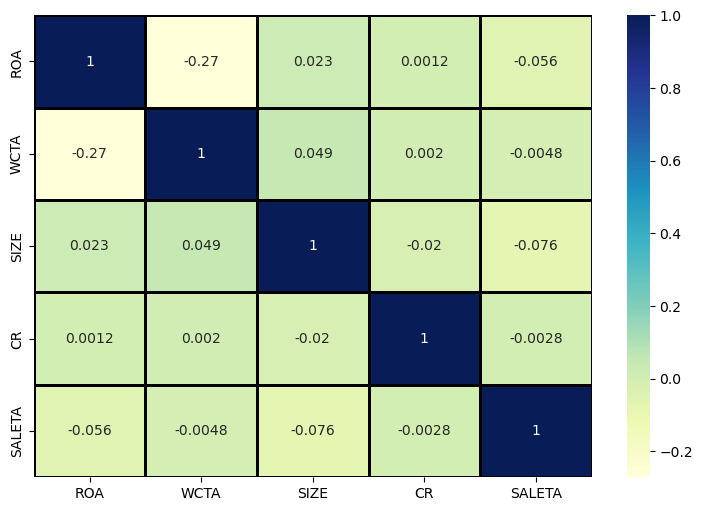

In [113]:
plt.figure(figsize=(9, 6))
sns.heatmap(
    df_corr.corr(),
    annot=True, 
    linewidths=1, 
    linecolor='black', 
    cmap="YlGnBu");

Дефлятор ВВП Польши:

ГЛАВНЫЙ https://svspb.net/danmark/vvp-defljator.php

https://take-profit.org/statistics/gdp-deflator/poland/

https://tradingeconomics.com/poland/gdp-deflator#:~:text=GDP%20Deflator%20in%20Poland%20averaged,the%20first%20quarter%20of%201995.

Про robust

https://stackoverflow.com/questions/61171429/change-covariance-type-to-robust-in-statsmodels-logit

https://analyticsindiamag.com/how-to-build-a-robust-logistic-regression-model-with-l2-regularization/

Про Эндогенность:

https://stats.stackexchange.com/questions/171479/difference-endogeneity-and-multicollinearity-in-logistic-regression

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.stata.com/meeting/sandiego12/materials/sd12_baum.pdf

## Построение модели 

In [114]:
df_corr = df_corr.rename(columns = {'class': 'Class'})

In [115]:
df_corr.isna().sum() # в данных есть пропуски

ROA        0
WCTA       0
SIZE       0
CR        18
SALETA     3
Class      0
dtype: int64

In [116]:
df_corr = df_corr[df_corr['CR'].notna()]  #удаляем из данных наблюдения в которых есть пропуски
df_corr = df_corr[df_corr['SALETA'].notna()]
df_corr['Class'] = df_corr['Class'].astype('int64')

In [117]:
df_corr.isna().sum()

ROA       0
WCTA      0
SIZE      0
CR        0
SALETA    0
Class     0
dtype: int64

In [128]:
df_corr['Class'].value_counts() #сколько обанкротившихся компаний после удаления пропусков

0    9989
1     494
Name: Class, dtype: int64

In [129]:
df_corr['Class'].mean() * 100 #какой % обанкротившихся компаний после удаления пропусков

4.7123914909854046

In [118]:
X = df_corr.drop(columns = 'Class')
y = df_corr['Class']

#делим данные на тестовую и обучающую выборку для измеренич качества модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [119]:
# построение регрессии
regr_data = pd.concat([X_train, y_train], axis =1)
log_reg_1 = smf.logit('Class ~ ROA + WCTA + SIZE + CR + SALETA', data=regr_data).fit()
print(log_reg_1.summary()) #оценка регрессии
print()
print(log_reg_1.get_margeff().summary()) #маржинальные эффекты
print( )
print('ROC-AUC:', roc_auc_score(y_test, log_reg_1.predict(X_test))) #ROC-AUC score на тестовой выборке

Optimization terminated successfully.
         Current function value: 0.189418
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 7338
Model:                          Logit   Df Residuals:                     7332
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 May 2023   Pseudo R-squ.:                 0.02217
Time:                        18:55:00   Log-Likelihood:                -1389.9
converged:                       True   LL-Null:                       -1421.5
Covariance Type:            nonrobust   LLR p-value:                 2.881e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9599      0.078    -38.049      0.000      -3.112      -2.807
ROA           -0.8337      0.